<a href="https://colab.research.google.com/github/Shuaib11-Github/Important-concepts/blob/main/WoMart_HACKHATON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/TRAIN.csv')
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [3]:
df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [4]:
df.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1128619,NaN,S1,L1,R1,2018-11-02,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


In [5]:
df.drop('#Order', axis=1, inplace=True)

In [6]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,45614.52
...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,49162.41


In [7]:
df.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
Sales            float64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,45614.52
...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,49162.41


In [9]:
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Day,Year,Month
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,1,2018,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,51789.12,1,2018,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,36868.20,1,2018,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,19715.16,1,2018,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,45614.52,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,37272.00,31,2019,5
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,54572.64,31,2019,5
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,31624.56,31,2019,5
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,49162.41,31,2019,5


In [10]:
df.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
Sales                   float64
Day                       int64
Year                      int64
Month                     int64
dtype: object

In [ ]:
df.set_index('Date', inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


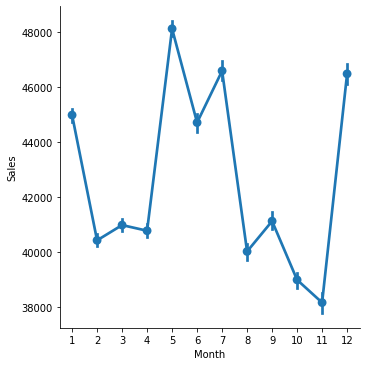

In [ ]:
sns.factorplot(data = df, x ="Month", y = "Sales")

In [ ]:
df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount', 'Sales', 'Day', 'Year', 'Month'],
      dtype='object')

In [ ]:
df1 = df.groupby(df['Store_id'])
df2 = df1.describe()
df3 = df2['Sales']['mean']
df3

Store_id
1      34698.442326
2      46333.863198
3      62479.448953
4      38482.236744
5      43452.710872
           ...     
361    33521.863779
362    34065.920523
363    41357.393779
364    30277.224651
365    30750.429012
Name: mean, Length: 365, dtype: float64

In [ ]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Day,Year,Month
Date,,,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,1,Yes,7011.84,1,2018,1
2018-01-01,T1000002,253,S4,L2,R1,1,Yes,51789.12,1,2018,1
2018-01-01,T1000003,252,S3,L2,R1,1,Yes,36868.20,1,2018,1
2018-01-01,T1000004,251,S2,L3,R1,1,Yes,19715.16,1,2018,1
2018-01-01,T1000005,250,S2,L3,R4,1,Yes,45614.52,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,T1188336,149,S2,L3,R2,1,Yes,37272.00,31,2019,5
2019-05-31,T1188337,153,S4,L2,R1,1,No,54572.64,31,2019,5
2019-05-31,T1188338,154,S1,L3,R2,1,No,31624.56,31,2019,5


In [ ]:
sales_df = df[['Date','Sales']]
sales_df

,Date,Sales
0,2018-01-01,7011.84
1,2018-01-01,51789.12
2,2018-01-01,36868.20
3,2018-01-01,19715.16
4,2018-01-01,45614.52
...,...,...
188335,2019-05-31,37272.00
188336,2019-05-31,54572.64
188337,2019-05-31,31624.56
188338,2019-05-31,49162.41


In [ ]:
sale = sales_df.groupby('Date')['Sales'].sum().reset_index()
sale = sale.set_index('Date')
sale.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=516, freq=None)

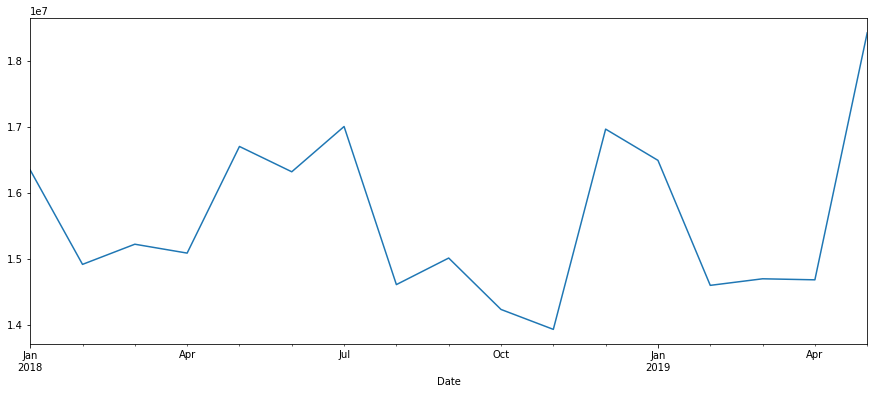

In [ ]:
y = sale['Sales'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

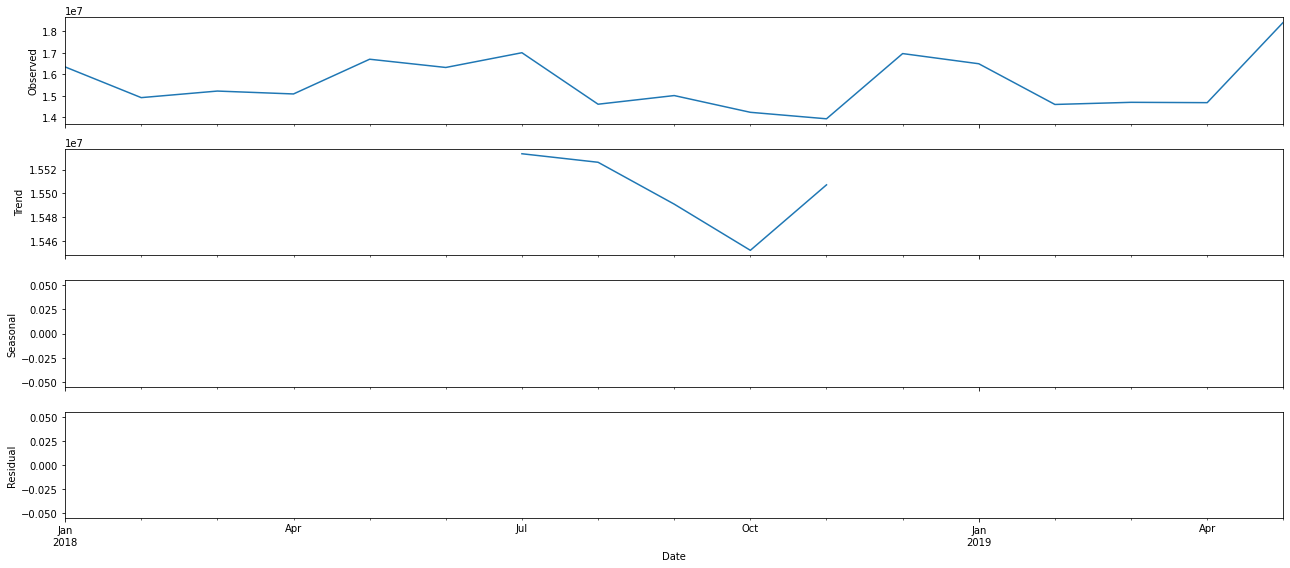

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:577.4194768743946
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:130.4802176663647
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:154.42009042572244
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:532.979321224402
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:95.49468635874601
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:180.8241795987159
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:472.6138508005142
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:102.84540013088434
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:121.68313228470835
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:440.14997190047234


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:127.86984999837995
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:505.7451243984248
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:125.0664850719191
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:127.8373499290954
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:471.2258885299048


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:56856570045.66014
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:129.95098756669537
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:473.9855801614752
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:96.4119086825647
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:96.99786615804612
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:436.19707378832777
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:98.9488534164596


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -3.7671      2.100     -1.794      0.073      -7.883       0.349
sigma2      1.035e+11    2.3e-11   4.49e+21      0.000    1.04e+11    1.04e+11


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2215: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2220: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)


ValueError: ignored

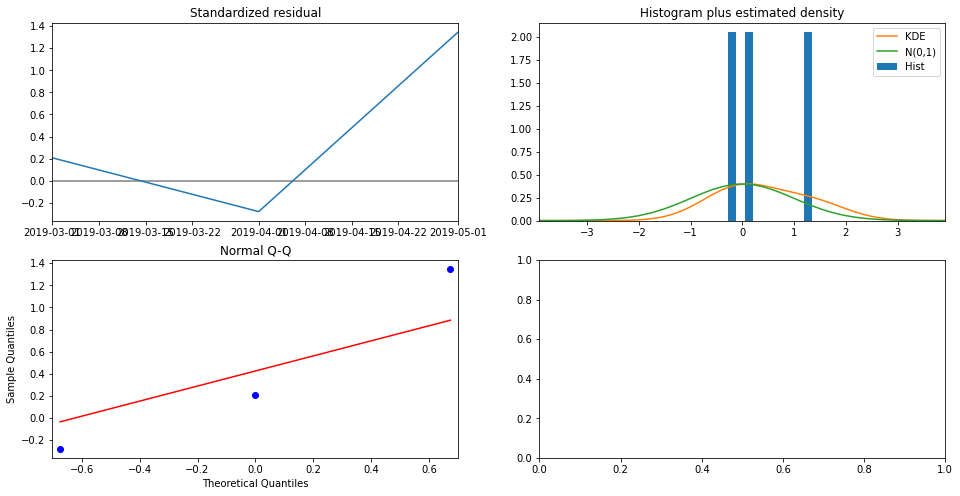

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

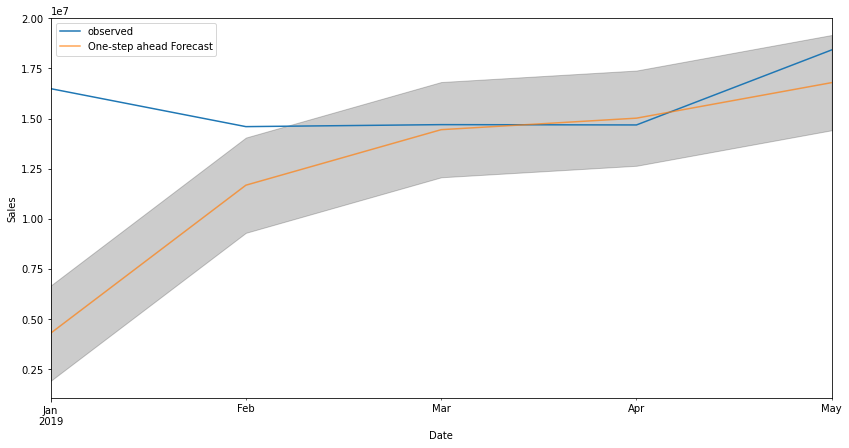

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-05-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2663917195153.22


In [ ]:
num_col = ['Store_id', 'Date', 'Holiday', 'Sales']
cat_col = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount']

In [ ]:
category_col = pd.get_dummies(df[cat_col])
category_col

,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105880,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
105881,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
105882,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
105883,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
new_df = pd.concat([df[num_col], category_col], axis=1)
new_df

,Store_id,Date,Holiday,Sales,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
0,1,2018-01-01,1.0,7011.84,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,253,2018-01-01,1.0,51789.12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,252,2018-01-01,1.0,36868.20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,251,2018-01-01,1.0,19715.16,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,250,2018-01-01,1.0,45614.52,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105880,287,2018-10-18,1.0,18561.60,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
105881,224,2018-10-18,1.0,34636.14,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
105882,158,2018-10-18,1.0,30752.40,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
105883,193,2018-10-18,1.0,18675.36,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


In [11]:
import plotly.express as px
for i in df['Store_id'].unique():
    subset = df[df['Store_id'] == i]
    subset['moving_average'] = subset['Sales'].rolling(30).mean()
    fig = px.line(subset, x="Date", y=["Sales","moving_average"], title=str(i), template = 'plotly_dark')
    fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: ignored

In [ ]:
subset

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Day,Year,Month,moving_average
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,1,2018,1,NaN
607,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,42369.00,2,2018,1,NaN
1046,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,50037.00,3,2018,1,NaN
1207,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,44397.00,4,2018,1,NaN
1752,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,47604.00,5,2018,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186569,T1186570,1,S1,L3,R1,2019-05-27,0,Yes,33075.00,27,2019,5,42284.840
187165,T1187166,1,S1,L3,R1,2019-05-28,0,Yes,37317.00,28,2019,5,42617.740
187391,T1187392,1,S1,L3,R1,2019-05-29,0,Yes,44652.00,29,2019,5,42888.940
187962,T1187963,1,S1,L3,R1,2019-05-30,0,Yes,42387.00,30,2019,5,43784.140


In [ ]:
y = subset[['Sales', 'moving_average']]
y

,Sales,moving_average
0,7011.84,NaN
607,42369.00,NaN
1046,50037.00,NaN
1207,44397.00,NaN
1752,47604.00,NaN
...,...,...
186569,33075.00,42284.840
187165,37317.00,42617.740
187391,44652.00,42888.940
187962,42387.00,43784.140


In [ ]:
subset.isnull().sum()

ID                 0
Store_id           0
Store_Type         0
Location_Type      0
Region_Code        0
Date               0
Holiday            0
Discount           0
Sales              0
Day                0
Year               0
Month              0
moving_average    29
dtype: int64

In [ ]:
subset.head(30)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Day,Year,Month,moving_average
187975,T1187976,12,S1,L3,R2,2019-05-31,1,Yes,50993.28,31,2019,5,NaN
187976,T1187977,298,S4,L1,R1,2019-05-31,1,No,75098.37,31,2019,5,NaN
187977,T1187978,215,S3,L2,R1,2019-05-31,1,No,41223.60,31,2019,5,NaN
187978,T1187979,229,S1,L1,R2,2019-05-31,1,No,39454.80,31,2019,5,NaN
187979,T1187980,302,S1,L4,R2,2019-05-31,1,No,26224.80,31,2019,5,NaN
187980,T1187981,222,S4,L2,R2,2019-05-31,1,No,88808.94,31,2019,5,NaN
187981,T1187982,299,S1,L1,R3,2019-05-31,1,No,35396.64,31,2019,5,NaN
187982,T1187983,294,S4,L2,R2,2019-05-31,1,Yes,79951.68,31,2019,5,NaN
187983,T1187984,365,S2,L1,R2,2019-05-31,1,No,30720.87,31,2019,5,NaN
187984,T1187985,230,S2,L4,R4,2019-05-31,1,No,24877.65,31,2019,5,NaN


In [ ]:
subset[subset['Store_id']==302]

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Day,Year,Month,moving_average
187979,T1187980,302,S1,L4,R2,2019-05-31,1,No,26224.8,31,2019,5,NaN


In [ ]:
subset['Store_id'].nunique()

365

In [ ]:
subset['Sales'].rolling(30).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
360    42749.013
361    42097.173
362    41735.109
363    41689.682
364    40370.170
Name: Sales, Length: 365, dtype: float64

In [ ]:
import plotly.express as px
for i in df['Store_id'].unique():
    subset = df[df['Store_id'] == i]
    subset['moving_average'] = subset['Sales'].rolling(30).mean()
    fig = px.line(subset, x="Date", y=['Sales','moving_average'], template = 'plotly_dark')
    fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: ignored

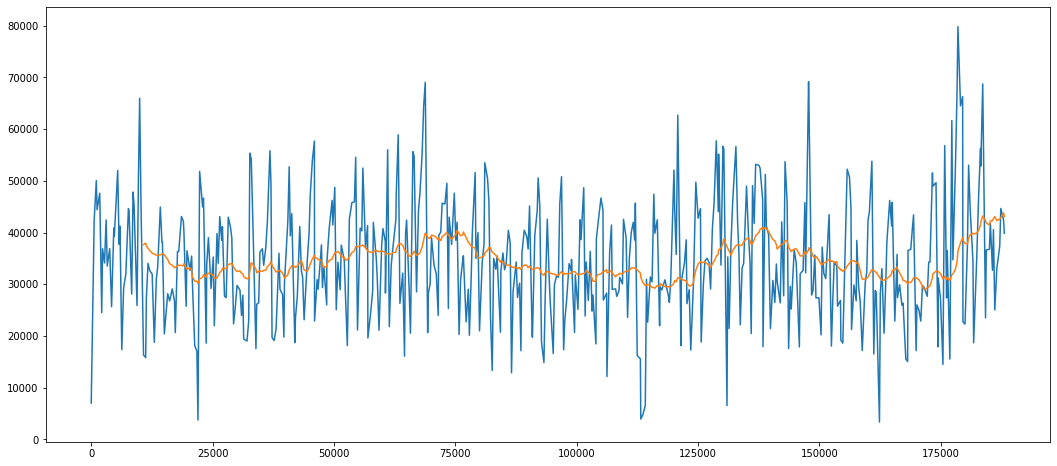

In [ ]:
plt.plot(subset[['Sales', 'moving_average']])